In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

     

In [2]:
import pandas as pd


In [3]:
# Define the path to your dataset
dataset_path = "C:/Users/niyat/Desktop/pre-processed.csv"
# Load your dataset
df = pd.read_csv(dataset_path)
df.head(5)
     

,tweets,ClassLabel
0,a a woman you shouldnt complain about cleaning...,2
1,rtboydatscoldtygadwnbad for cuffindathoeinthe1...,1
2,dawg you ever fuck a bitch and she start to cr...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1


In [4]:
print(df['tweets'][12])
     


so hoe that smoke are loser yea go on ig


In [5]:
df.shape


(24781, 2)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24781 entries, 0 to 24780
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweets      24781 non-null  object
 1   ClassLabel  24781 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.3+ KB


In [7]:

# Using dropna() to remove rows with missing values
df_cleaned = df.dropna()

In [8]:
# Checking the information
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24781 entries, 0 to 24780
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweets      24781 non-null  object
 1   ClassLabel  24781 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.3+ KB
None
(24781, 2)


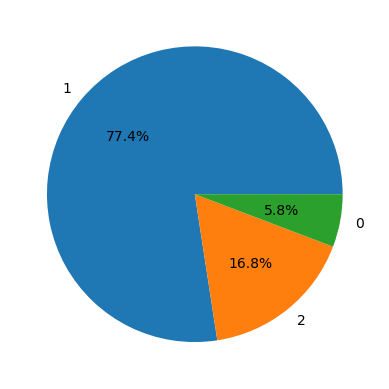

In [10]:
import matplotlib.pyplot as plt
import pandas as pd 
plt.pie(df['ClassLabel'].value_counts().values,
		labels = df['ClassLabel'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [11]:
print(df['tweets'][5313])
print(df['tweets'][1153])
print(df['tweets'][352])
     

somebody look like the die on the first tube on flappy bird lol
it too early dont annoy me dont come back from ya fun filled weekend and give me attitude hoe
stacey dash won baddest bitch eva aaa


In [13]:
class_counts = df['ClassLabel'].value_counts()

# Display the counts
print(class_counts)

ClassLabel
1    19189
2     4162
0     1430
Name: count, dtype: int64


In [14]:
# Remove empty rows
df = df.dropna()

# Get the total number of non-empty rows in the DataFrame
total_rows = df.shape[0]
print("Total number of non-empty rows:", total_rows)

Total number of non-empty rows: 24781


In [16]:

class_counts = df['ClassLabel'].value_counts()

# Display the counts
print(class_counts)
     

ClassLabel
1    19189
2     4162
0     1430
Name: count, dtype: int64


In [18]:
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Data preprocessing steps
def preprocess_text(text):
    if not pd.isna(text):  # Check for NaN values
        # Remove HTML tags
        text = BeautifulSoup(str(text), "html.parser").get_text()
        # Convert to lowercase
        text = text.lower()
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove punctuation and non-alphanumeric tokens
        tokens = [token for token in tokens if token.isalnum()]
        # Join tokens back into a sentence
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ""

# Apply preprocessing to the 'tweet' column
df['Preprocessed_Sentence'] = df['tweets'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niyat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
print(df['Preprocessed_Sentence'][5313])
print(df['Preprocessed_Sentence'][1153])
print(df['Preprocessed_Sentence'][352])

somebody look like the die on the first tube on flappy bird lol
it too early dont annoy me dont come back from ya fun filled weekend and give me attitude hoe
stacey dash won baddest bitch eva aaa


In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed_Sentence'], df['ClassLabel'], stratify=df['ClassLabel'])
     


In [22]:
from collections import Counter

label_counts = Counter(y_train)
label_0_count = label_counts[0]
label_1_count = label_counts[1]
label_2_count = label_counts[2]
print("Label 0 count:", label_0_count)
print("Label 1 count:", label_1_count)
print("Label 2 count:", label_2_count)
     

Label 0 count: 1073
Label 1 count: 14391
Label 2 count: 3121


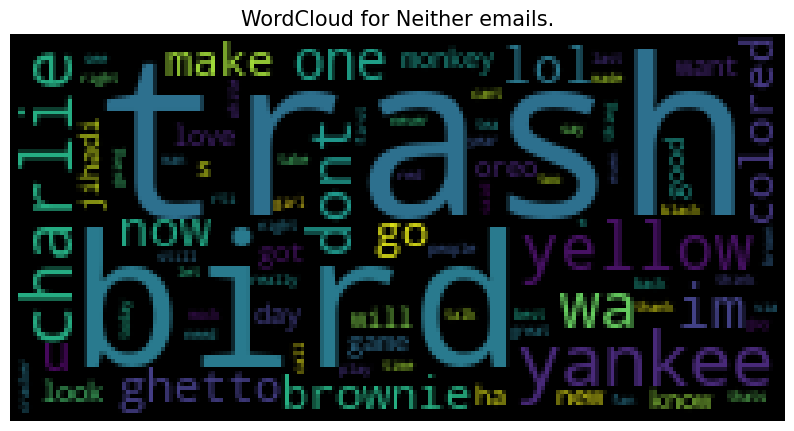

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(data, typ):
    # Joining all the tweets to get the corpus
    email_corpus = " ".join(data['tweets'])

    plt.figure(figsize=(10, 10))

    # Forming the word cloud
    wc = WordCloud(max_words=100,
                   width=200,
                   height=100,
                   collocations=False).generate(email_corpus)

    # Plotting the word cloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize=15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

# Example usage:
plot_word_cloud(df[df['ClassLabel']==2], typ='Neither')

In [25]:
class_2 = df[df['ClassLabel'] == 2]
class_1 = df[df['ClassLabel'] == 1].sample(n=3500)
class_0 = df[df['ClassLabel'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)
     

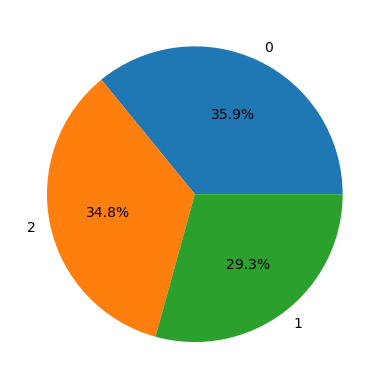

In [27]:
plt.pie(balanced_df['ClassLabel'].value_counts().values, #balance the dataset
        labels=balanced_df['ClassLabel'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [29]:

features = balanced_df['tweets'] #word to vector
target = balanced_df['ClassLabel']

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape
     

((9561,), (2391,))

In [30]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape


((9561, 3), (2391, 3))

In [31]:
max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')

token.fit_on_texts(X_train)

#We have fitted the tokenizer on our training data we will use it to convert the training and validation data both to vectors
     

In [32]:
# Splitting data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# Training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words, lower=True, split=' ')
token.fit_on_texts(X_train)

# Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq, maxlen=50, padding='post', truncating='post')

Validation_seq = token.texts_to_sequences(X_val)
Validation_pad = pad_sequences(Validation_seq, maxlen=50, padding='post', truncating='post')

Testing_seq = token.texts_to_sequences(X_test)
Testing_pad = pad_sequences(Testing_seq, maxlen=50, padding='post', truncating='post')


In [34]:
# Define the Bi-LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(3, activation='softmax'))  # Assuming you have 3 classes


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()
     

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(Training_pad, Y_train, epochs=10, batch_size=32, validation_data=(Validation_pad, Y_val))
     

Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.5724 - loss: 0.8645 - val_accuracy: 0.8275 - val_loss: 0.4678
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.8905 - loss: 0.3300 - val_accuracy: 0.8573 - val_loss: 0.4126
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9367 - loss: 0.1996 - val_accuracy: 0.8646 - val_loss: 0.4205
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9587 - loss: 0.1287 - val_accuracy: 0.8489 - val_loss: 0.5715
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9695 - loss: 0.1047 - val_accuracy: 0.8589 - val_loss: 0.5089
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9763 - loss: 0.0746 - val_accuracy: 0.8620 - val_loss: 0.5503
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9816 - loss: 0.0554 - val_accuracy: 0.8657 - val_loss: 0.5256
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.9858 - loss: 0.0567 - 

Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9895 - loss: 0.0336 - val_accuracy: 0.8646 - val_loss: 0.6164
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.9875 - loss: 0.0368 - val_accuracy: 0.8589 - val_loss: 0.6974
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9877 - loss: 0.0347 - val_accuracy: 0.8568 - val_loss: 0.7135
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9918 - loss: 0.0211 - val_accuracy: 0.8479 - val_loss: 0.7305
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9941 - loss: 0.0211 - val_accuracy: 0.8677 - val_loss: 0.7195
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.8610 - val_loss: 0.7986
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9929 - loss: 0.0182 - val_accuracy: 0.8495 - val_loss: 0.8697
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9915 - loss: 0.0257 - 

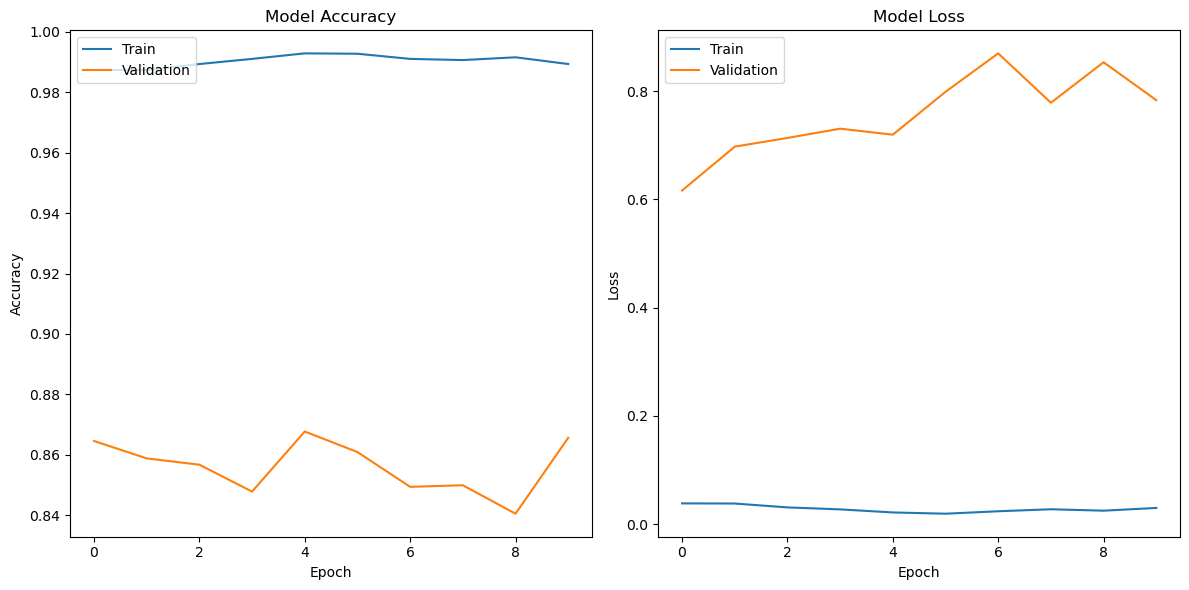

In [41]:
import matplotlib.pyplot as plt

# Train the model and capture the history
history = model.fit(Training_pad, Y_train, epochs=10, batch_size=32, validation_data=(Validation_pad, Y_val))

# Visualize the training history epoch-by-epoch
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the history
plot_history(history)


In [48]:
 #Evaluate the model on the validation set
loss, accuracy = model.evaluate(Validation_pad, Y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8793 - loss: 0.7163
Validation Loss: 0.7832, Validation Accuracy: 0.8657
